# Carga de datos

In [ ]:
!pip install --upgrade pip setuptools
!pip uninstall accelerate transformers
!pip install -q transformers[torch]
!pip install -q accelerate -U

Found existing installation: transformers 4.40.1
Uninstalling transformers-4.40.1:
  Would remove:
    /usr/local/bin/transformers-cli
    /usr/local/lib/python3.10/dist-packages/transformers-4.40.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/transformers/*
Proceed (Y/n)? Y
  Successfully uninstalled transformers-4.40.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 89.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install jsonlines
!pip install -q datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 4.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import jsonlines
import pandas as pd
import torch
#import tensorflow as tf
from google.colab import drive
from sklearn.model_selection import train_test_split
from collections import Counter
from datasets import DatasetDict, Dataset
#from transformers import BartTokenizer, BartModel, BartForConditionalGeneration
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
#from transformers import T5ForConditionalGeneration, T5Tokenizer


In [ ]:
from transformers import BartTokenizer, BartModel, BartForConditionalGeneration

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def cargarDataset(ruta):
  datos = []
  with jsonlines.open(ruta) as archivo:
      for linea in archivo:
          datos.append(linea)
  df = pd.DataFrame(datos)
  return df

In [ ]:
rutaPlosVal = '/content/drive/MyDrive/TFM/biolaysumm2024_data/PLOS_val.jsonl'
rutaPlosTest = '/content/drive/MyDrive/TFM/biolaysumm2024_data/PLOS_test.jsonl'
rutaPlosTrain = '/content/drive/MyDrive/TFM/biolaysumm2024_data/PLOS_train.jsonl'

dataPlosVal = cargarDataset(rutaPlosVal)
dataPlosTest = cargarDataset(rutaPlosTest)
dataPlosTrain = cargarDataset(rutaPlosTrain)

In [ ]:
rutaLifeTest = '/content/drive/MyDrive/TFM/biolaysumm2024_data/eLife_test.jsonl'
rutaLifeTrain = '/content/drive/MyDrive/TFM/biolaysumm2024_data/eLife_train.jsonl'
rutaLifeVal = '/content/drive/MyDrive/TFM/biolaysumm2024_data/eLife_val.jsonl'

dataLifeTest = cargarDataset(rutaLifeTest)
dataLifeTrain = cargarDataset(rutaLifeTrain)
dataLifeVal = cargarDataset(rutaLifeVal)

In [ ]:
a = dataLifeTrain.iloc[0]
a.article

'In temperate climates , winter deaths exceed summer ones . However , there is limited information on the timing and the relative magnitudes of maximum and minimum mortality , by local climate , age group , sex and medical cause of death . We used geo-coded mortality data and wavelets to analyse the seasonality of mortality by age group and sex from 1980 to 2016 in the USA and its subnational climatic regions . Death rates in men and women ≥ 45 years peaked in December to February and were lowest in June to August , driven by cardiorespiratory diseases and injuries . In these ages , percent difference in death rates between peak and minimum months did not vary across climate regions , nor changed from 1980 to 2016 . Under five years , seasonality of all-cause mortality largely disappeared after the 1990s . In adolescents and young adults , especially in males , death rates peaked in June/July and were lowest in December/January , driven by injury deaths . \n It is well-established that

In [ ]:
a.lay_summary

'In the USA , more deaths happen in the winter than the summer . But when deaths occur varies greatly by sex , age , cause of death , and possibly region . Seasonal differences in death rates can change over time due to changes in factors that cause disease or affect treatment . Analyzing the seasonality of deaths can help scientists determine whether interventions to minimize deaths during a certain time of year are needed , or whether existing ones are effective . Scrutinizing seasonal patterns in death over time can also help scientists determine whether large-scale weather or climate changes are affecting the seasonality of death . Now , Parks et al . show that there are age and sex differences in which times of year most deaths occur . Parks et al . analyzed data on US deaths between 1980 and 2016 . While overall deaths in a year were highest in winter and lowest in summer , a greater number of young men died during summer – mainly due to injuries – than during winter . Seasonal d

In [ ]:
dataPlosTrain.head()

,lay_summary,article,headings,keywords,id
0,"In the kidney , structures known as nephrons a...","Kidney function depends on the nephron , which...","[Abstract, Introduction, Results, Discussion, ...","[developmental biology, danio (zebrafish), ver...",journal.pgen.0030189
1,Many species of bats in North America have bee...,White-nose syndrome is one of the most lethal ...,"[Abstract, Introduction, Results, Discussion, ...","[sequencing techniques, fungal spores, vertebr...",journal.ppat.1006076
2,The burden of dengue has been increasing over ...,Sustainable dengue intervention requires the p...,"[Abstract, Introduction, Methods, Results, Dis...","[invertebrates, medicine and health sciences, ...",journal.pntd.0007498
3,Estrogen exposure is the most important risk f...,Despite the central role of estrogen exposure ...,"[Abstract, Introduction, Results, Discussion, ...","[oncology/breast cancer, oncology/gynecologica...",journal.pgen.1001012
4,Melioidosis is a severe tropical infection cau...,Macrophage migration inhibitory factor ( MIF )...,"[Abstract, Introduction, Methods, Results, Dis...",[immunology/cellular microbiology and pathogen...,journal.pntd.0000605


In [ ]:
dataPlosVal.head()

,lay_summary,article,headings,keywords,id
0,Messenger RNAs carry the instructions necessar...,Gene expression varies widely between individu...,"[Abstract, Introduction, Results, Discussion, ...","[genetics, biology, genomics, genetics and gen...",journal.pgen.1002882
1,"Annually , more than two million people are in...",The live attenuated simian immunodeficiency vi...,"[Abstract, Introduction, Materials and Methods...",[],journal.ppat.1004633
2,The opportunistic pathogen Candida albicans is...,Mucosal infections with Candida albicans belon...,"[Abstract, Introduction, Results, Discussion, ...","[blood cells, cell motility, medicine and heal...",journal.ppat.1005882
3,"Lymphatic filariasis ( LF ) , commonly known a...","Between 2000–2007 , the Global Programme to El...","[Abstract, Introduction, Methods, Results, Dis...",[infectious diseases/neglected tropical diseas...,journal.pntd.0000708
4,Parkinson’s disease ( PD ) is a neurodegenerat...,Homozygous mutations in the glucocerebrosidase...,"[Abstract, Introduction, Results, Discussion, ...",[],journal.pgen.1005065


In [ ]:
dataPlosTest.head()

,article,headings,keywords,id
0,Lung-resident ( LR ) mesenchymal stem and stro...,"[Abstract, Introduction, Results, Discussion, ...","[immune system, medical conditions, molecular ...",journal.ppat.1009789
1,Visceral leishmaniasis ( VL ) is endemic in So...,"[Abstract, Introduction, Methods, Results, Dis...","[neonates, clinical laboratory sciences, trans...",journal.pntd.0007992
2,A high burden of Salmonella enterica subspecie...,"[Abstract, Introduction, Methods, Results, Dis...","[pathogens, medical conditions, taxonomy, bact...",journal.pntd.0010704
3,Severe Acute Respiratory Syndrome Coronavirus-...,"[Abstract, Introduction, Results, Discussion, ...","[pathogens, amniotes, medical conditions, bind...",journal.ppat.1010691
4,Many fungal species utilize hydroxyderivatives...,"[Abstract, Introduction, Results and discussio...","[taxonomy, proteins, chemistry, genetics, enzy...",journal.pgen.1009815


# Descripcion de los datos

In [ ]:
print("Los datos de train de la revista PLOS tienen {} instancias".format(dataPlosTrain.shape[0]))
print("Los datos de test de la revista PLOS tienen {} instancias".format(dataPlosTest.shape[0]))
print("Los datos de validacion de la revista PLOS tienen {} instancias".format(dataPlosVal.shape[0]))
print("Los datos de train de la revista eLife tienen {} instancias".format(dataLifeTrain.shape[0]))
print("Los datos de test de la revista eLife tienen {} instancias".format(dataLifeTest.shape[0]))
print("Los datos de validacion de la revista eLife tienen {} instancias".format(dataLifeVal.shape[0]))

Los datos de train de la revista PLOS tienen 24773 instancias
Los datos de test de la revista PLOS tienen 142 instancias
Los datos de validacion de la revista PLOS tienen 1376 instancias
Los datos de train de la revista eLife tienen 4346 instancias
Los datos de test de la revista eLife tienen 142 instancias
Los datos de validacion de la revista eLife tienen 241 instancias


In [ ]:
porcentajeTrain = (len(dataPlosTrain) / (len(dataPlosTrain) + len(dataLifeTrain))) * 100
porcentajeVal = (len(dataPlosVal) / (len(dataPlosVal) + len(dataLifeVal))) * 100
porcentajeTest = (len(dataPlosTest) / (len(dataPlosTest) + len(dataLifeTest))) * 100

print("Porcentajes train")
print("\tPLOS: {:.2f}%".format(porcentajeTrain))
print("\teLife: {:.2f}%".format(100 - porcentajeTrain))
print("Porcentajes test")
print("\tPLOS: {:.2f}%".format(porcentajeTest))
print("\teLife: {:.2f}%".format(100 - porcentajeTest))
print("Porcentajes validacion")
print("\tPLOS: {:.2f}%".format(porcentajeVal))
print("\teLife: {:.2f}%".format(100 - porcentajeVal))

Porcentajes train
	PLOS: 85.08%
	eLife: 14.92%
Porcentajes test
	PLOS: 50.00%
	eLife: 50.00%
Porcentajes validacion
	PLOS: 85.10%
	eLife: 14.90%


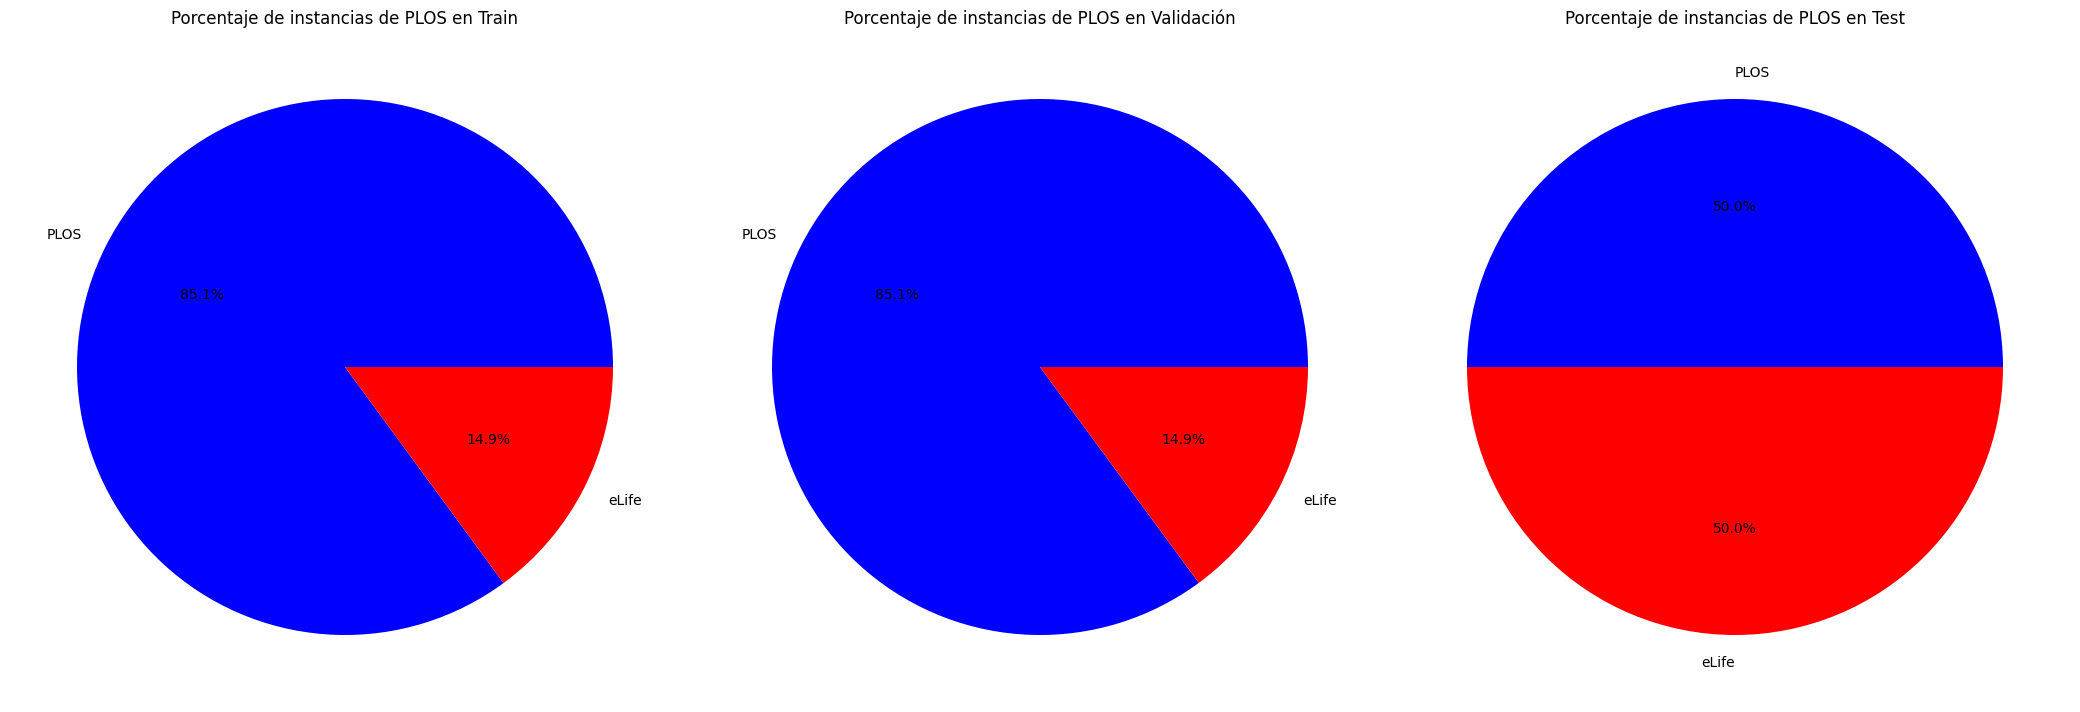

In [ ]:
porcentajes = [porcentajeTrain, porcentajeVal, porcentajeTest]
nombres = ['Train', 'Validación', 'Test']

fig, axs = plt.subplots(1, 3, figsize=(21, 7))

for i, (nombre, porcentaje) in enumerate(zip(nombres, porcentajes)):
    axs[i].pie([porcentaje, 100-porcentaje], labels=['PLOS', 'eLife'], autopct='%1.1f%%', colors=['blue', 'red'])
    axs[i].set_title(f'Porcentaje de instancias de PLOS en {nombre}')

plt.tight_layout()
plt.show()


## article

In [ ]:
length_plosTrain=dataPlosTrain["article"].apply(lambda text: len(text.split()))
length_plosTrain.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

count    24773.000000
mean      6754.095749
std       2260.340264
min        748.000000
25%       5164.000000
50%       6581.000000
75%       8091.000000
90%       9609.000000
95%      10688.800000
99%      13101.240000
max      26643.000000
Name: article, dtype: float64

In [ ]:
length_plosVal=dataPlosVal["article"].apply(lambda text: len(text.split()))
length_plosVal.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

count     1376.000000
mean      6741.484012
std       2335.620351
min        751.000000
25%       5212.250000
50%       6563.000000
75%       8084.000000
90%       9712.500000
95%      10650.500000
99%      13061.250000
max      20423.000000
Name: article, dtype: float64

In [ ]:
length_plosTest=dataPlosTest["article"].apply(lambda text: len(text.split()))
length_plosTest.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

count      142.000000
mean      6939.288732
std       2592.099274
min       1587.000000
25%       5245.750000
50%       6331.000000
75%       8311.750000
90%      10372.200000
95%      11400.950000
99%      13465.360000
max      18477.000000
Name: article, dtype: float64

In [ ]:
length_lifeTrain=dataLifeTrain["article"].apply(lambda text: len(text.split()))
length_lifeTrain.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

count     4346.000000
mean     10200.274045
std       3479.930206
min        324.000000
25%       7804.000000
50%       9890.000000
75%      12259.750000
90%      14698.000000
95%      16176.500000
99%      20132.300000
max      28696.000000
Name: article, dtype: float64

In [ ]:
length_lifeVal=dataLifeVal["article"].apply(lambda text: len(text.split()))
length_lifeVal.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

count      241.000000
mean     10031.257261
std       3292.607543
min       3408.000000
25%       7780.000000
50%       9707.000000
75%      12014.000000
90%      14889.000000
95%      16046.000000
99%      17222.200000
max      23048.000000
Name: article, dtype: float64

In [ ]:
length_lifeTest=dataLifeTest["article"].apply(lambda text: len(text.split()))
length_lifeTest.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

count      142.000000
mean      8909.154930
std       2567.304233
min       2492.000000
25%       7357.000000
50%       8482.500000
75%      10533.000000
90%      12199.900000
95%      13318.700000
99%      16101.760000
max      16880.000000
Name: article, dtype: float64

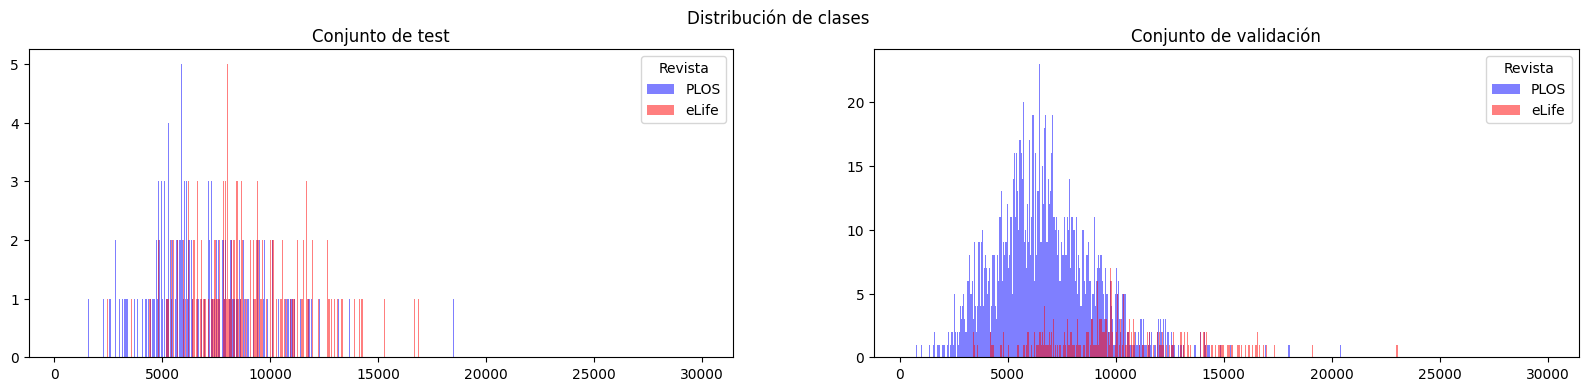

In [ ]:
fig,  (ax_test, ax_val) = plt.subplots(1, 2, figsize=(20, 4))
fig.suptitle('Distribución de clases')

ax_test.hist(length_plosTest, bins=np.arange(300, 30000, 25), color='blue', alpha=0.5, label='PLOS')
ax_test.hist(length_lifeTest, bins=np.arange(300, 30000, 25), color='red', alpha=0.5, label='eLife')
ax_test.set_title('Conjunto de test')
ax_test.legend(title='Revista')

ax_val.hist(length_plosVal, bins=np.arange(300, 30000, 25), color='blue', alpha=0.5, label='PLOS')
ax_val.hist(length_lifeVal, bins=np.arange(300, 30000, 25), color='red', alpha=0.5, label='eLife')
ax_val.set_title('Conjunto de validación')
ax_val.legend(title='Revista')

plt.show()

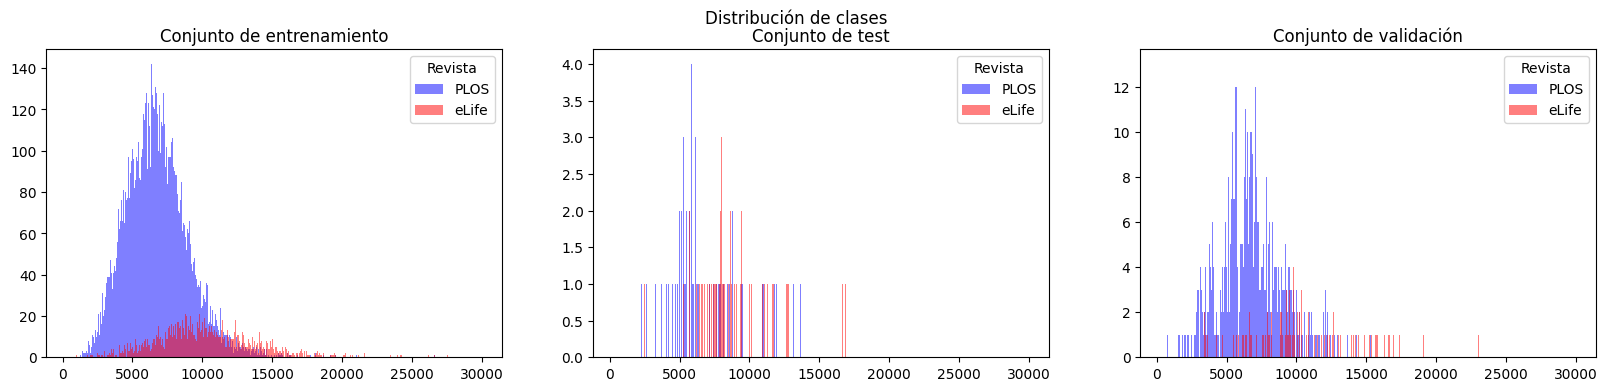

In [ ]:
fig, (ax_train, ax_test, ax_val) = plt.subplots(1, 3, figsize=(20, 4))
fig.suptitle('Distribución de clases')

ax_train.hist(length_plosTrain, bins=np.arange(300, 30000, 25), color='blue', alpha=0.5, label='PLOS')
ax_train.hist(length_lifeTrain, bins=np.arange(300, 30000, 25), color='red', alpha=0.5, label='eLife')
ax_train.set_title('Conjunto de entrenamiento')
ax_train.legend(title='Revista')

ax_test.hist(length_plosTest, bins=np.arange(300, 30000, 25), color='blue', alpha=0.5, label='PLOS')
ax_test.hist(length_lifeTest, bins=np.arange(300, 30000, 25), color='red', alpha=0.5, label='eLife')
ax_test.set_title('Conjunto de test')
ax_test.legend(title='Revista')

ax_val.hist(length_plosVal, bins=np.arange(300, 30000, 25), color='blue', alpha=0.5, label='PLOS')
ax_val.hist(length_lifeVal, bins=np.arange(300, 30000, 25), color='red', alpha=0.5, label='eLife')
ax_val.set_title('Conjunto de validación')
ax_val.legend(title='Revista')

plt.show()

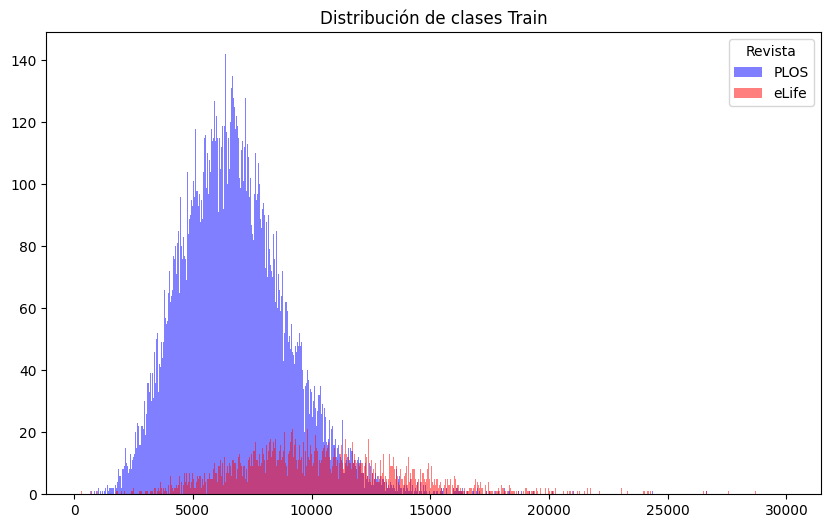

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(length_plosTrain, bins=np.arange(300, 30000, 25), color='blue', alpha=0.5, label='PLOS')
ax.hist(length_lifeTrain, bins=np.arange(300, 30000, 25), color='red', alpha=0.5, label='eLife')
ax.set_title('Distribución de clases Train')
ax.legend(title='Revista')

plt.show()

## lay_summary

In [ ]:
length_plosTrain_summary=dataPlosTrain["lay_summary"].apply(lambda text: len(text.split()))
length_plosTrain_summary.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

count    24773.000000
mean       194.902999
std         36.825714
min          4.000000
25%        174.000000
50%        202.000000
75%        218.000000
90%        229.000000
95%        241.000000
99%        283.000000
max        511.000000
Name: lay_summary, dtype: float64

In [ ]:
length_plosVal_summary=dataPlosVal["lay_summary"].apply(lambda text: len(text.split()))
length_plosVal_summary.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

count    1376.000000
mean      194.513808
std        36.601816
min        55.000000
25%       173.000000
50%       202.000000
75%       217.000000
90%       228.000000
95%       239.000000
99%       290.500000
max       384.000000
Name: lay_summary, dtype: float64

In [ ]:
length_lifeTrain_summary=dataLifeTrain["lay_summary"].apply(lambda text: len(text.split()))
length_lifeTrain_summary.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

count    4346.000000
mean      382.266222
std        64.334356
min       177.000000
25%       338.000000
50%       379.000000
75%       423.000000
90%       467.000000
95%       493.000000
99%       540.550000
max       686.000000
Name: lay_summary, dtype: float64

In [ ]:
length_lifeVal_summary=dataLifeVal["lay_summary"].apply(lambda text: len(text.split()))
length_lifeVal_summary.describe(percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99])

count    241.000000
mean     389.875519
std       69.910844
min      234.000000
25%      338.000000
50%      384.000000
75%      441.000000
90%      481.000000
95%      506.000000
99%      543.000000
max      672.000000
Name: lay_summary, dtype: float64

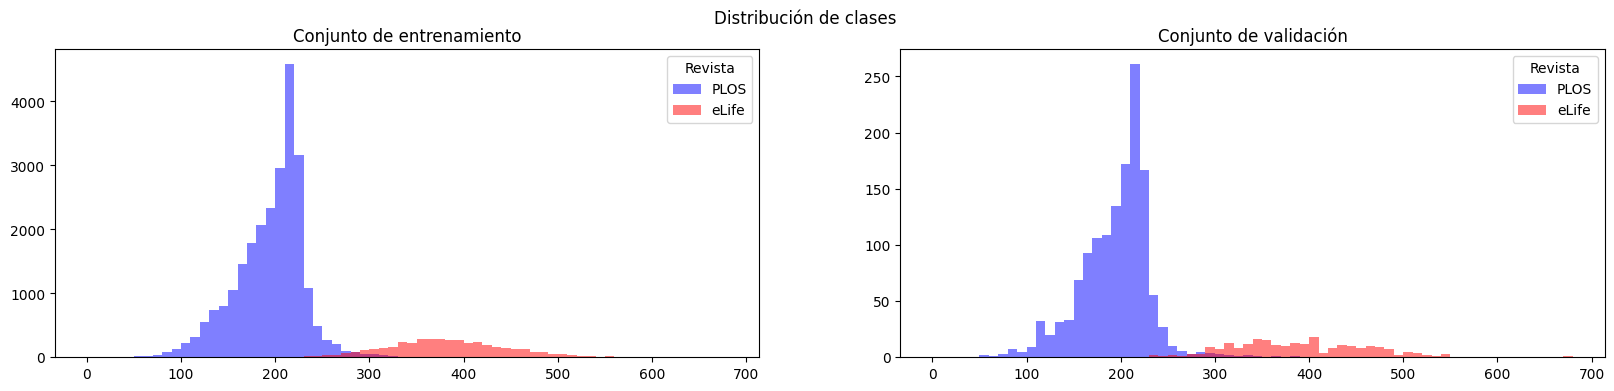

In [ ]:
fig, (ax_train, ax_val) = plt.subplots(1, 2, figsize=(20, 4))
fig.suptitle('Distribución de clases')

ax_train.hist(length_plosTrain_summary, bins=np.arange(0, 690, 10), color='blue', alpha=0.5, label='PLOS')
ax_train.hist(length_lifeTrain_summary, bins=np.arange(0, 690, 10), color='red', alpha=0.5, label='eLife')
ax_train.set_title('Conjunto de entrenamiento')
ax_train.legend(title='Revista')

ax_val.hist(length_plosVal_summary, bins=np.arange(0, 690, 10), color='blue', alpha=0.5, label='PLOS')
ax_val.hist(length_lifeVal_summary, bins=np.arange(0, 690, 10), color='red', alpha=0.5, label='eLife')
ax_val.set_title('Conjunto de validación')
ax_val.legend(title='Revista')

plt.show()

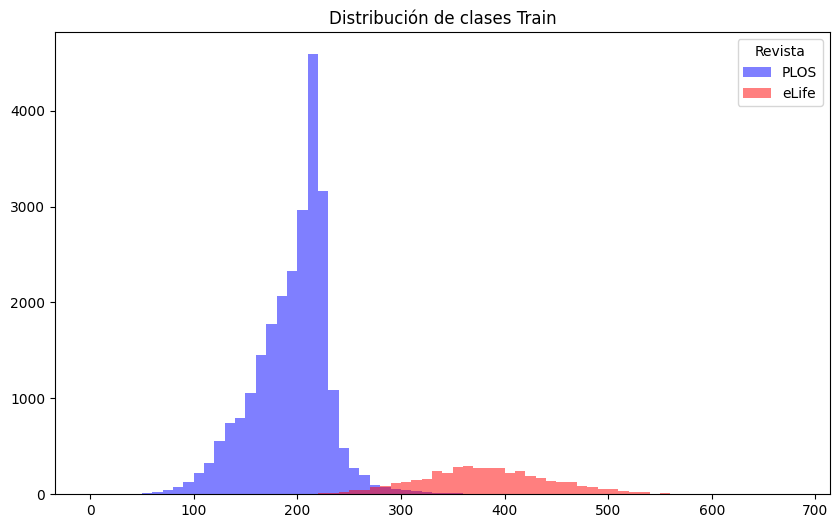

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(length_plosTrain_summary, bins=np.arange(0, 690, 10), color='blue', alpha=0.5, label='PLOS')
ax.hist(length_lifeTrain_summary, bins=np.arange(0, 690, 10), color='red', alpha=0.5, label='eLife')
ax.set_title('Distribución de clases Train')
ax.legend(title='Revista')

plt.show()

## Headings

In [ ]:
word_counter_plosTrain = Counter()
for index, row in dataPlosTrain.iterrows():
    words = [word.lower() for word in row["headings"]]
    word_counter_plosTrain.update(words)
print(word_counter_plosTrain)

Counter({'abstract': 24773, 'introduction': 24734, 'discussion': 23025, 'results': 22978, 'materials and methods': 16457, 'methods': 7198, 'results/discussion': 875, 'results and discussion': 689, 'material and methods': 358, 'supporting information': 350, 'conclusion': 183, 'conclusions': 154, 'models': 143, 'model': 131, 'methods and materials': 63, 'materials & methods': 56, '': 24, 'models and methods': 22, 'method': 20, 'design and implementation': 19, 'availability and future directions': 19, 'methods and models': 16, 'methodology': 15, 'discussions': 14, 'acknowledgments': 13, 'result': 11, 'experimental procedures': 10, 'accession numbers': 7, 'results & discussion': 7, 'ethics statement': 7, 'discussion and conclusion': 7, 'results and discussions': 6, 'concluding remarks': 6, 'material & methods': 5, 'background': 5, 'materials and method': 5, 'summary': 5, 'data access': 5, 'model and methods': 4, 'disclaimer': 4, 'discussion and conclusions': 3, 'statistical analysis': 3, '

In [ ]:
word_counter_plosVal = Counter()
for index, row in dataPlosVal.iterrows():
    words = [word.lower() for word in row["headings"]]
    word_counter_plosVal.update(words)
print(word_counter_plosVal)

Counter({'abstract': 1376, 'introduction': 1375, 'results': 1263, 'discussion': 1255, 'materials and methods': 914, 'methods': 403, 'results/discussion': 55, 'results and discussion': 51, 'material and methods': 19, 'conclusions': 16, 'supporting information': 12, 'model': 9, 'models': 9, 'conclusion': 9, 'methods and materials': 3, 'discussions': 2, 'materials and method': 2, 'methods and models': 2, 'materials & methods': 2, 'models and methods': 2, '': 2, 'bioinformatics analysis': 1, 'future directions': 1, 'gb interacts with gh/gl but not gh/gl/go or gh/gl/ul128-131': 1, 'perm-seq with with multiple sources of data': 1, 'parameter estimation in the perm-seq model': 1, 'design and implementation': 1, 'availability and future directions': 1, 'funding': 1, 'accession numbers/id numbers for': 1, 'results & discussion': 1, 'list of the agi codes for the arabidopsis genes': 1, 'figshare information': 1, 'birth, death, migration, mutation, and resource consumption and release': 1, 'resul

In [ ]:
word_counter_lifeTrain = Counter()
for index, row in dataLifeTrain.iterrows():
    words = [word.lower() for word in row["headings"]]
    word_counter_lifeTrain.update(words)
print(word_counter_lifeTrain)

Counter({'abstract': 4346, 'introduction': 4316, 'discussion': 4017, 'results': 4006, 'materials and methods': 3872, 'materials\xa0and\xa0methods': 272, 'results and discussion': 262, 'material and methods': 82, 'methods': 22, 'main text': 9, 'model': 7, 'materials\xa0and methods': 7, 'conclusions': 7, 'methods and materials': 6, 'results\xa0and\xa0discussion': 5, 'acknowledgments': 5, 'conclusion': 5, 'materials': 3, 'm': 3, 'accession numbers': 2, 'materials and\xa0methods': 2, '': 2, 'result': 2, 'materials\xa0and\xa0\ufeffmethods': 2, 'materials and method': 1, 'ethics statement': 1, 'smoothness and the neural code': 1, 'deep learning networks': 1, 'mathematical model': 1, 'experimental procedures': 1, 'modeling framework': 1, 'set-up of the quorum-sensing model': 1, 'results of numerical simulations': 1, 'results of mathematical analysis': 1, 'clinical observations': 1, 'bradykinin-induced local pulmonary angioedema': 1, 'targeted treatment and timing of interventions': 1, 'method

In [ ]:
word_counter_lifeVal = Counter()
for index, row in dataLifeVal.iterrows():
    words = [word.lower() for word in row["headings"]]
    word_counter_lifeVal.update(words)
print(word_counter_lifeVal)

Counter({'abstract': 241, 'introduction': 239, 'discussion': 223, 'results': 219, 'materials and methods': 217, 'materials\xa0and\xa0methods': 17, 'results and discussion': 15, 'material and methods': 3, 'results\xa0and\xa0discussion': 2, 'methods': 1, 'conclusion': 1, 'conclusions': 1, 'chemical synthesis': 1, 'material\xa0and\xa0methods': 1})


In [ ]:
def contar_elementos(row):
    return len(row["headings"])

In [ ]:
numEle_plosTrain = dataPlosTrain.apply(contar_elementos, axis=1)
print(numEle_plosTrain.value_counts())

5     22214
4      1772
6       674
3        42
7        29
2        10
8        10
9         6
13        5
11        4
10        4
12        2
15        1
Name: count, dtype: int64


In [ ]:
numEle_plosVal = dataPlosVal.apply(contar_elementos, axis=1)
print(numEle_plosVal.value_counts())

5    1219
4     117
6      34
7       4
3       1
2       1
Name: count, dtype: int64


In [ ]:
numEle_lifeTrain = dataLifeTrain.apply(contar_elementos, axis=1)
print(numEle_lifeTrain.value_counts())

5    3912
4     352
6      34
3      32
2      13
7       3
Name: count, dtype: int64


In [ ]:
numEle_lifeVal = dataLifeVal.apply(contar_elementos, axis=1)
print(numEle_lifeVal.value_counts())

5    217
4     21
3      2
6      1
Name: count, dtype: int64


## keywords

In [ ]:
def contar_elementos_kw(row):
    return len(row["keywords"])

In [ ]:
numEle_plosTrain_kw = dataPlosTrain.apply(contar_elementos_kw, axis=1)
print(numEle_plosTrain_kw.value_counts())

0     3471
4     1506
3     1480
5     1268
2     1128
6     1032
7      824
8      720
1      669
9      606
30     591
29     550
31     533
28     508
33     496
32     496
10     487
26     481
27     467
34     455
11     427
25     424
12     396
24     382
36     376
35     355
37     345
13     343
23     315
22     302
14     295
15     279
38     269
20     257
39     255
21     232
40     219
16     217
17     207
19     202
18     202
41     187
42     124
43     120
44      87
45      60
46      55
47      22
49      13
48      12
50       9
52       9
51       5
57       1
53       1
68       1
Name: count, dtype: int64


In [ ]:
numEle_plosVal_kw = dataPlosVal.apply(contar_elementos_kw, axis=1)
print(numEle_plosVal_kw.value_counts())

0     194
5      85
3      82
4      69
6      63
2      53
7      50
8      44
9      41
32     37
27     35
31     32
10     31
1      31
29     30
33     29
25     29
28     28
35     27
34     25
30     25
26     23
22     22
37     22
38     21
11     19
12     18
13     17
36     17
20     17
24     17
23     15
14     14
39     14
19     14
17     10
42     10
15      9
43      8
21      8
44      7
41      7
16      7
18      6
40      6
45      5
47      2
54      1
Name: count, dtype: int64


In [ ]:
numEle_lifeTrain_kw = dataLifeTrain.apply(contar_elementos_kw, axis=1)
print(numEle_lifeTrain_kw.value_counts())

2    2145
1    1988
3     211
0       2
Name: count, dtype: int64


In [ ]:
numEle_lifeVal_kw = dataLifeVal.apply(contar_elementos_kw, axis=1)
print(numEle_lifeVal_kw.value_counts())

1    127
2    107
3      7
Name: count, dtype: int64


# Modelos


## Modelo bio-BART

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("GanjinZero/biobart-v2-large")
model = AutoModelForSeq2SeqLM.from_pretrained("GanjinZero/biobart-v2-large")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.09k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.59M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/892k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.77G [00:00<?, ?B/s]

### Crear Dict-dataset

In [ ]:
X_train_plos = dataPlosTrain["abstractText"]
y_train_plos = dataPlosTrain["lay_summary"]
X_val_plos = dataPlosVal["abstractText"]
y_val_plos = dataPlosVal["lay_summary"]
#X_train_plos, X_test_plos, y_train_plos, y_test_plos = train_test_split(X_plos, y_plos, test_size=0.10, random_state=42)

In [ ]:
X_train_elife = dataLifeTrain["abstractText"]
y_train_elife = dataLifeTrain["lay_summary"]
X_val_elife = dataLifeVal["abstractText"]
y_val_elife = dataLifeVal["lay_summary"]
#X_train_elife, X_test_elife, y_train_elife, y_test_elife = train_test_split(X_elife, y_elife, test_size=0.10, random_state=42)

In [ ]:
X_train = pd.concat([X_train_elife, X_train_plos], ignore_index=True)
y_train = pd.concat([y_train_elife, y_train_plos], ignore_index=True)
X_val = pd.concat([X_val_elife, X_val_plos], ignore_index=True)
y_val = pd.concat([y_val_elife, y_val_plos], ignore_index=True)

In [ ]:
print("train PLOS: {} - {}".format(len(X_train_plos), len(y_train_plos)))
#print("test PLOS: {} - {}".format(len(X_test_plos), len(y_test_plos)))
print("val PLOS: {} - {}".format(len(X_val_plos), len(y_val_plos)))

train PLOS: 24773 - 24773
val PLOS: 1376 - 1376


In [ ]:
print("train eLife: {} - {}".format(len(X_train_elife), len(y_train_elife)))
#print("test eLife: {} - {}".format(len(X_test_elife), len(y_test_elife)))
print("val eLife: {} - {}".format(len(X_val_elife), len(y_val_elife)))

train eLife: 4346 - 4346
val eLife: 241 - 241


In [ ]:
train_plos = {
    'document': X_train_plos,
    'summary': y_train_plos
}
validation_plos = {
    'document': X_val_plos,
    'summary': y_val_plos
}

In [ ]:
train_elife = {
    'document': X_train_elife,
    'summary': y_train_elife
}
validation_elife = {
    'document': X_val_elife,
    'summary': y_val_elife
}

In [ ]:
validation_dataset_plos = Dataset.from_dict(validation_plos)
train_dataset_plos = Dataset.from_dict(train_plos)
#test_dataset_plos = Dataset.from_dict(test_plos)

In [ ]:
validation_dataset_elife = Dataset.from_dict(validation_elife)
train_dataset_elife = Dataset.from_dict(train_elife)
#test_dataset_elife = Dataset.from_dict(test_elife)

In [ ]:
dict_dataset_plos = DatasetDict({
    'train': train_dataset_plos,
    'validation': validation_dataset_plos,
   #'test': test_dataset_plos
})
dict_dataset_plos

DatasetDict({
    train: Dataset({
        features: ['document', 'summary'],
        num_rows: 24773
    })
    validation: Dataset({
        features: ['document', 'summary'],
        num_rows: 1376
    })
})

In [ ]:
dict_dataset_elife = DatasetDict({
    'train': train_dataset_elife,
    'validation': validation_dataset_elife,
   #'test': test_dataset_elife
})
dict_dataset_elife

DatasetDict({
    train: Dataset({
        features: ['document', 'summary'],
        num_rows: 4346
    })
    validation: Dataset({
        features: ['document', 'summary'],
        num_rows: 241
    })
})

### tokenizador

In [ ]:
MAX_INPUT_LENGTH = 1024
MAX_OUTPUT_LENGTH = 512

def tokenize(examples):
    model_inputs = tokenizer(examples["document"], max_length=MAX_INPUT_LENGTH, padding=True, truncation=True, return_tensors="pt")
    labels = tokenizer(text_target=examples["summary"], max_length=MAX_OUTPUT_LENGTH,  padding=True, truncation=True, return_tensors="pt")
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

In [ ]:
encoded_dataset_plos = dict_dataset_plos.map(tokenize, batched=True)
encoded_dataset_plos

Map:   0%|          | 0/24773 [00:00<?, ? examples/s]

Map:   0%|          | 0/1376 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['document', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 24773
    })
    validation: Dataset({
        features: ['document', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 1376
    })
})

In [ ]:
encoded_dataset_elife = dict_dataset_elife.map(tokenize, batched=True)
encoded_dataset_elife

Map:   0%|          | 0/4346 [00:00<?, ? examples/s]

Map:   0%|          | 0/241 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['document', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 4346
    })
    validation: Dataset({
        features: ['document', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 241
    })
})

### Training

In [ ]:
batch_size = 4

args = Seq2SeqTrainingArguments(
    output_dir='./outputs',
    evaluation_strategy = 'epoch',
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=2,
    predict_with_generate=True,
    fp16=True,
)

In [ ]:
from transformers import DataCollatorForSeq2Seq
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [ ]:
trainer = Seq2SeqTrainer(
    model = model,
    args = args,
    train_dataset=encoded_dataset_plos["train"],
    eval_dataset=encoded_dataset_plos["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer
)

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss
1,1.020600,0.959888


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generatio

Epoch,Training Loss,Validation Loss
1,1.020600,0.959888
2,0.946700,0.953426


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generatio

TrainOutput(global_step=12388, training_loss=0.9821252942970579, metrics={'train_runtime': 7275.1766, 'train_samples_per_second': 6.81, 'train_steps_per_second': 1.703, 'total_flos': 8.998725148127232e+16, 'train_loss': 0.9821252942970579, 'epoch': 2.0})

In [ ]:
trainer.save_model("/content/drive/MyDrive/TFM/models/modeloBioBARTplos-Abstract")

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_eos_token_id': 2}


In [ ]:
trainer_eLife.evaluate()

## LED

In [ ]:
from transformers import LongformerTokenizer, LongformerForSequenceClassification, Trainer, TrainingArguments
import torch

tokenizer = AutoTokenizer.from_pretrained("allenai/led-base-16384")
model = AutoModelForSeq2SeqLM.from_pretrained("allenai/led-base-16384", gradient_checkpointing=True, use_cache=False)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/27.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.09k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/648M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/168 [00:00<?, ?B/s]

In [ ]:
# set generate hyperparameters
model.config.num_beams = 2
model.config.max_length = 512
model.config.min_length = 100
model.config.length_penalty = 2.0
model.config.early_stopping = True
model.config.no_repeat_ngram_size = 3
max_input_length = 12000 # it is calculated
max_output_length = 1024
batch_size = 1

### Dataset

In [ ]:
def datasetXtokens(dataset, tokens=12000):
  dataset["tokens"] = dataset["article"].apply(lambda text: len(text.split()))
  df = dataset[dataset["tokens"] < tokens]
  return df

In [ ]:
dataPlosTrainT5 = datasetXtokens(dataPlosTrain)
dataPlosValT5 = datasetXtokens(dataPlosVal)
dataLifeTrainT5 = datasetXtokens(dataLifeTrain)
dataLifeValT5 = datasetXtokens(dataLifeVal)

### DictDataset

In [ ]:
X_train_plos = dataPlosTrainT5["article"]
y_train_plos = dataPlosTrainT5["lay_summary"]
X_val_plos = dataPlosValT5["article"]
y_val_plos = dataPlosValT5["lay_summary"]
#X_train_plos, X_test_plos, y_train_plos, y_test_plos = train_test_split(X_plos, y_plos, test_size=0.10, random_state=42)

In [ ]:
X_train_elife = dataLifeTrainT5["article"]
y_train_elife = dataLifeTrainT5["lay_summary"]
X_val_elife = dataLifeValT5["article"]
y_val_elife = dataLifeValT5["lay_summary"]
#X_train_elife, X_test_elife, y_train_elife, y_test_elife = train_test_split(X_elife, y_elife, test_size=0.10, random_state=42)

In [ ]:
X_train = pd.concat([X_train_elife, X_train_plos], ignore_index=True)
y_train = pd.concat([y_train_elife, y_train_plos], ignore_index=True)
X_val = pd.concat([X_val_elife, X_val_plos], ignore_index=True)
y_val = pd.concat([y_val_elife, y_val_plos], ignore_index=True)

In [ ]:
train_plos = {
    'document': X_train,
    'summary': y_train
}
validation_plos = {
    'document': X_val,
    'summary': y_val
}

In [ ]:
val_dataset = Dataset.from_dict(validation_plos)
train_dataset = Dataset.from_dict(train_plos)
#test_dataset_plos = Dataset.from_dict(test_plos)

In [ ]:
dict_dataset = DatasetDict({
    'train': train_dataset,
    'validation': val_dataset,
   #'test': test_dataset_plos
})
dict_dataset

DatasetDict({
    train: Dataset({
        features: ['document', 'summary'],
        num_rows: 14102
    })
    validation: Dataset({
        features: ['document', 'summary'],
        num_rows: 800
    })
})

### Tokenizador

In [ ]:
def process_data_to_model_inputs(batch):
    # tokenize the inputs and labels
    inputs = tokenizer(
        batch["document"],
        padding='max_length',
        truncation=True,
        max_length=max_input_length,
    )
    outputs = tokenizer(
        batch["summary"],
        padding="max_length",
        truncation=True,
        max_length=max_output_length,
    )

    batch["input_ids"] = inputs.input_ids
    batch["attention_mask"] = inputs.attention_mask

    # create 0 global_attention_mask lists
    batch["global_attention_mask"] = len(batch["input_ids"]) * [
        [0 for _ in range(len(batch["input_ids"][0]))]
    ]

    # since above lists are references, the following line changes the 0 index for all samples
    batch["global_attention_mask"][0][0] = 1
    batch["labels"] = outputs.input_ids

    # We have to make sure that the PAD token is ignored
    batch["labels"] = [
        [-100 if token == tokenizer.pad_token_id else token for token in labels]
        for labels in batch["labels"]
    ]

    return batch

In [ ]:
train_dataset = train_dataset.map(
    process_data_to_model_inputs,
    batched=True,
    batch_size=batch_size,
    remove_columns=["document", "summary"],
)

train_dataset.set_format(
    type="torch",
    columns=["input_ids", "attention_mask", "global_attention_mask", "labels"],
)

val_dataset = val_dataset.map(
    process_data_to_model_inputs,
    batched=True,
    batch_size=batch_size,
    remove_columns=["document", "summary"],
)

val_dataset.set_format(
    type="torch",
    columns=["input_ids", "attention_mask", "global_attention_mask", "labels"],
)

Map:   0%|          | 0/14102 [00:00<?, ? examples/s]

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

### Train

In [ ]:
training_args = Seq2SeqTrainingArguments(
    predict_with_generate=True,
    evaluation_strategy="steps",
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    fp16=True,
    output_dir="./",
    logging_steps=250,
    eval_steps=2500,
    save_steps=2500,
    save_total_limit=2,
    gradient_accumulation_steps=4,
    num_train_epochs=1,
)

In [ ]:
trainer = Seq2SeqTrainer(
    model=model,
    tokenizer=tokenizer,
    args=training_args,
    #compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

In [ ]:
trainer.train()

Step,Training Loss,Validation Loss
2500,2.289700,2.224426


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'min_length': 100, 'early_stopping': True, 'num_beams': 2, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3}
Your generation config was originally created from the model config, but the model config has changed since then. Unless you pass the `generation_config` argument to this model's `generate` calls, they will revert to the legacy behavior where the base `generate` parameterization is loaded from the model config instead. To avoid this behavior and this warning, we recommend you to overwrite the generation config model attribute before calling the model's `save_pretrained`, preferably also removing any generation kwargs from the model config. T

TrainOutput(global_step=3525, training_loss=2.3453664641684675, metrics={'train_runtime': 5664.5919, 'train_samples_per_second': 2.489, 'train_steps_per_second': 0.622, 'total_flos': 6.66275542990848e+16, 'train_loss': 2.3453664641684675, 'epoch': 0.9998581761452277})

In [ ]:
trainer.save_model("/content/drive/MyDrive/TFM/models/modeloLED-7k")

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 512, 'min_length': 100, 'early_stopping': True, 'num_beams': 2, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3}
Your generation config was originally created from the model config, but the model config has changed since then. Unless you pass the `generation_config` argument to this model's `generate` calls, they will revert to the legacy behavior where the base `generate` parameterization is loaded from the model config instead. To avoid this behavior and this warning, we recommend you to overwrite the generation config model attribute before calling the model's `save_pretrained`, preferably also removing any generation kwargs from the model config. T